# import modules

In [460]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import random
import time
import re
from time import sleep

### Installing selenium

In [17]:
!pip install selenium

### Importing from selenium

In [461]:
from selenium import webdriver

### Setting path for webdriver

In [462]:
#open_browser 
browser = webdriver.Chrome()
browser.maximize_window()
#get_webpage
mobile_phones = 'https://www.amazon.ca/Unlocked-Cell-Phones-Smartphones/b?ie=UTF8&node=3379583011' 
browser.get(mobile_phones)

In [463]:
print(browser.title)

Amazon.ca: Unlocked Cell Phones & Smartphones: Electronics


In [464]:
#get _the_input_elements
search = browser.find_element(By.ID,"twotabsearchtextbox")
search_button = browser.find_element(By.XPATH,"//input[@type='submit'][1]")

In [465]:
# send the input to the webpage
search.send_keys("Smart phones")
sleep(1)
search_button.click()

## Scrap products from Amazon

In [466]:
# Data lists to store extracted information
products = []
prices = []
ratings = []
reviews = []
images = []

In [474]:
# Function to extract data from a single product element
def extract_product_data(p):
    try:
        product_name = p.find_element(By.XPATH, ".//span[@class='a-size-medium a-color-base a-text-normal']").text
    except:
        product_name = "N/A"

    try:
        price_whole = p.find_element(By.XPATH, ".//span[@class='a-price-whole']").text
        price_fraction = p.find_element(By.XPATH, ".//span[@class='a-price-fraction']").text
        price = f"{price_whole}.{price_fraction}"
    except:
        price = "N/A"

    try:
        rating = p.find_element(By.XPATH, ".//i[contains(@class, 'a-icon-alt')]").text.split()[0]
    except:
        rating = "N/A"

    try:
        review_count = p.find_element(By.XPATH, ".//span[@class='a-size-base s-underline-text']").text
    except:
        review_count = "N/A"

    try:
        image_url = p.find_element(By.XPATH, ".//img[@class='s-image']").get_attribute('src')
    except:
        image_url = "N/A"

    return product_name, price, rating, review_count, image_url


In [475]:
# Initialize lists to store data
products = []
prices = []
ratings = []
reviews = []
images = []

# Loop through pages and scrape data
for i in range(3):  # Number of pages to scrape
    print('Scraping page', i + 1)
    
    # Locate all product elements on the page
    product_elements = browser.find_elements(By.XPATH, "//div[contains(@class, 's-main-slot')]//div[contains(@class, 's-result-item')]")
    print(f"Found {len(product_elements)} product elements on page {i + 1}")

    for p in product_elements:
        product_name, price, rating, review_count, image_url = extract_product_data(p)

        # Append the data to lists
        products.append(product_name)
        prices.append(price)
        ratings.append(rating)
        reviews.append(review_count)
        images.append(image_url)

    # Move to the next page
    try:
        next_button = browser.find_element(By.CLASS_NAME, 's-pagination-next')
        next_button.click()
        sleep(3)  
    except:
        print("No more pages to scrape or unable to locate next button.")
        break


Scraping page 1
Found 39 product elements on page 1
Scraping page 2
Found 39 product elements on page 2
Scraping page 3
Found 38 product elements on page 3


In [476]:
# Create a DataFrame to organize the scraped data
df = pd.DataFrame({
    'Product Name': products,
    'Price': prices,
    'Rating': ratings,
    'Review Count': reviews,
    'Image URL': images
})

# Print the DataFrame
df.head(50)


,Product Name,Price,Rating,Review Count,Image URL
0,N/A,N/A,N/A,N/A,N/A
1,N/A,N/A,N/A,N/A,N/A
2,"5G Unlocked Cell Phones Canada, UMIDIGI G6 5G ...",269.99,N/A,135,https://m.media-amazon.com/images/I/71qWqcET5G...
3,"UMIDIGI A15T Cell Phones, Android 13 Smartphon...",209.99,N/A,268,https://m.media-amazon.com/images/I/81xLGwXj0+...
4,"Unlocked Cell Phones Canada OUKITEL WP36, 1060...",279.99,N/A,3,https://m.media-amazon.com/images/I/819uBpW3QS...
5,𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Cell Phone OSCAL C30 Smartphone Andr...,139.99,N/A,43,https://m.media-amazon.com/images/I/814GUTPhV4...
6,"Rugged Phone Canada, Ulefone Armor X12 Rugged ...",169.99,N/A,35,https://m.media-amazon.com/images/I/71QfRZbKyu...
7,𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Unlocked Phone OSCAL C30 Smartphone ...,139.99,N/A,21,https://m.media-amazon.com/images/I/81BpNAk6Zg...
8,Rugged Smartphone Unlocked Canada FOSSIBOT F10...,229.99,N/A,152,https://m.media-amazon.com/images/I/71PJG8YECw...
9,Xiaomi Poco X6 Pro Smartphone 12+512GB 4nm Pro...,N/A,N/A,365,https://m.media-amazon.com/images/I/51ClQ5sgth...


In [477]:
len(products)

116

In [307]:
browser.quit()

In [478]:
df = df.drop_duplicates()
df.head()

,Product Name,Price,Rating,Review Count,Image URL
0,N/A,N/A,N/A,N/A,N/A
2,"5G Unlocked Cell Phones Canada, UMIDIGI G6 5G ...",269.99,N/A,135,https://m.media-amazon.com/images/I/71qWqcET5G...
3,"UMIDIGI A15T Cell Phones, Android 13 Smartphon...",209.99,N/A,268,https://m.media-amazon.com/images/I/81xLGwXj0+...
4,"Unlocked Cell Phones Canada OUKITEL WP36, 1060...",279.99,N/A,3,https://m.media-amazon.com/images/I/819uBpW3QS...
5,𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Cell Phone OSCAL C30 Smartphone Andr...,139.99,N/A,43,https://m.media-amazon.com/images/I/814GUTPhV4...


In [479]:
len(df)

90

In [480]:
# Save the DataFrame to a CSV file
csv_file_name = 'amazon_smartphones.csv'
df = df.to_csv(csv_file_name, index=False)

print(f"Data has been saved to CSV file: {csv_file_name}")


Data has been saved to CSV file: amazon_smartphones.csv


# Analyzing the extracted data 

In [482]:
#reading csv file
dfpie = pd.read_csv('amazon_smartphones.csv')
dfpie.head()

,Product Name,Price,Rating,Review Count,Image URL
0,NaN,NaN,NaN,NaN,NaN
1,"5G Unlocked Cell Phones Canada, UMIDIGI G6 5G ...",269.99,NaN,135,https://m.media-amazon.com/images/I/71qWqcET5G...
2,"UMIDIGI A15T Cell Phones, Android 13 Smartphon...",209.99,NaN,268,https://m.media-amazon.com/images/I/81xLGwXj0+...
3,"Unlocked Cell Phones Canada OUKITEL WP36, 1060...",279.99,NaN,3,https://m.media-amazon.com/images/I/819uBpW3QS...
4,𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Cell Phone OSCAL C30 Smartphone Andr...,139.99,NaN,43,https://m.media-amazon.com/images/I/814GUTPhV4...


In [483]:
#drop the rows with all NA values
dfpie.dropna(how = 'all', inplace = True)

In [484]:
dfpie.head()

,Product Name,Price,Rating,Review Count,Image URL
1,"5G Unlocked Cell Phones Canada, UMIDIGI G6 5G ...",269.99,NaN,135,https://m.media-amazon.com/images/I/71qWqcET5G...
2,"UMIDIGI A15T Cell Phones, Android 13 Smartphon...",209.99,NaN,268,https://m.media-amazon.com/images/I/81xLGwXj0+...
3,"Unlocked Cell Phones Canada OUKITEL WP36, 1060...",279.99,NaN,3,https://m.media-amazon.com/images/I/819uBpW3QS...
4,𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Cell Phone OSCAL C30 Smartphone Andr...,139.99,NaN,43,https://m.media-amazon.com/images/I/814GUTPhV4...
5,"Rugged Phone Canada, Ulefone Armor X12 Rugged ...",169.99,NaN,35,https://m.media-amazon.com/images/I/71QfRZbKyu...


In [485]:
#Set price as default value - zero 
dfpie['Price'].fillna(0, inplace = True) 
dfpie.head()

C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_7464\477852658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfpie['Price'].fillna(0, inplace = True)


,Product Name,Price,Rating,Review Count,Image URL
1,"5G Unlocked Cell Phones Canada, UMIDIGI G6 5G ...",269.99,NaN,135,https://m.media-amazon.com/images/I/71qWqcET5G...
2,"UMIDIGI A15T Cell Phones, Android 13 Smartphon...",209.99,NaN,268,https://m.media-amazon.com/images/I/81xLGwXj0+...
3,"Unlocked Cell Phones Canada OUKITEL WP36, 1060...",279.99,NaN,3,https://m.media-amazon.com/images/I/819uBpW3QS...
4,𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Cell Phone OSCAL C30 Smartphone Andr...,139.99,NaN,43,https://m.media-amazon.com/images/I/814GUTPhV4...
5,"Rugged Phone Canada, Ulefone Armor X12 Rugged ...",169.99,NaN,35,https://m.media-amazon.com/images/I/71QfRZbKyu...


In [488]:
import numpy as np
import seaborn as sn
# Assuming df['Price'] contains scraped price data as strings
# Example: "$45.99" or "45.99"
# Remove any non-numeric characters and convert to float

dfpie['Price'] = dfpie['Price'].replace({'\$': '', ',': ''}, regex=True)
dfpie['Price'] = pd.to_numeric(dfpie['Price'], errors='coerce')




<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_7464\145471667.py:7: SyntaxWarning: invalid escape sequence '\$'
  dfpie['Price'] = dfpie['Price'].replace({'\$': '', ',': ''}, regex=True)


In [491]:
# Create price category based on conditions
dfpie['Price Category'] = pd.cut(dfpie['Price'],
                              bins=[0, 40, 100, np.inf],
                              labels=['Low price', 'Average price', 'High price'])


print(dfpie[['Product Name', 'Price', 'Price Category']].head())


                                        Product Name   Price Price Category
1  5G Unlocked Cell Phones Canada, UMIDIGI G6 5G ...  269.99     High price
2  UMIDIGI A15T Cell Phones, Android 13 Smartphon...  209.99     High price
3  Unlocked Cell Phones Canada OUKITEL WP36, 1060...  279.99     High price
4  𝘽𝙡𝙖𝙘𝙠𝙫𝙞𝙚𝙬 Cell Phone OSCAL C30 Smartphone Andr...  139.99     High price
5  Rugged Phone Canada, Ulefone Armor X12 Rugged ...  169.99     High price


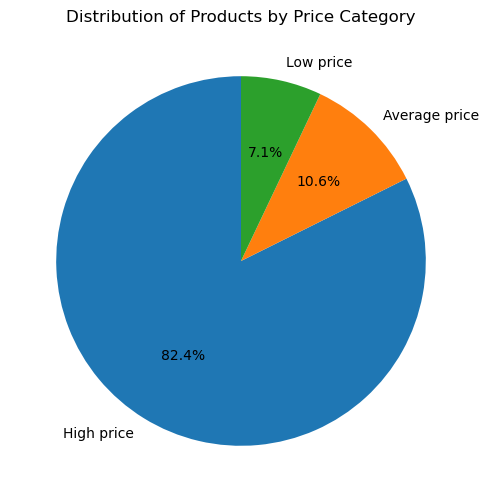

In [492]:
import matplotlib.pyplot as plt

# Count the number of products in each price category
price_category_counts = dfpie['Price Category'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(price_category_counts, labels=price_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Products by Price Category')
plt.show()


In [493]:
#Plotting top 5 mobiles that have review 
dfpie['Review Count'] = pd.to_numeric(dfpie['Review Count'], errors='coerce')
top_5_products = dfpie.sort_values(by='Review Count', ascending=False).head(5)


C:\Users\rowan.amr\AppData\Local\Temp\ipykernel_7464\788913884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Product Name', y='Review Count', data=top_5_products, palette='viridis');


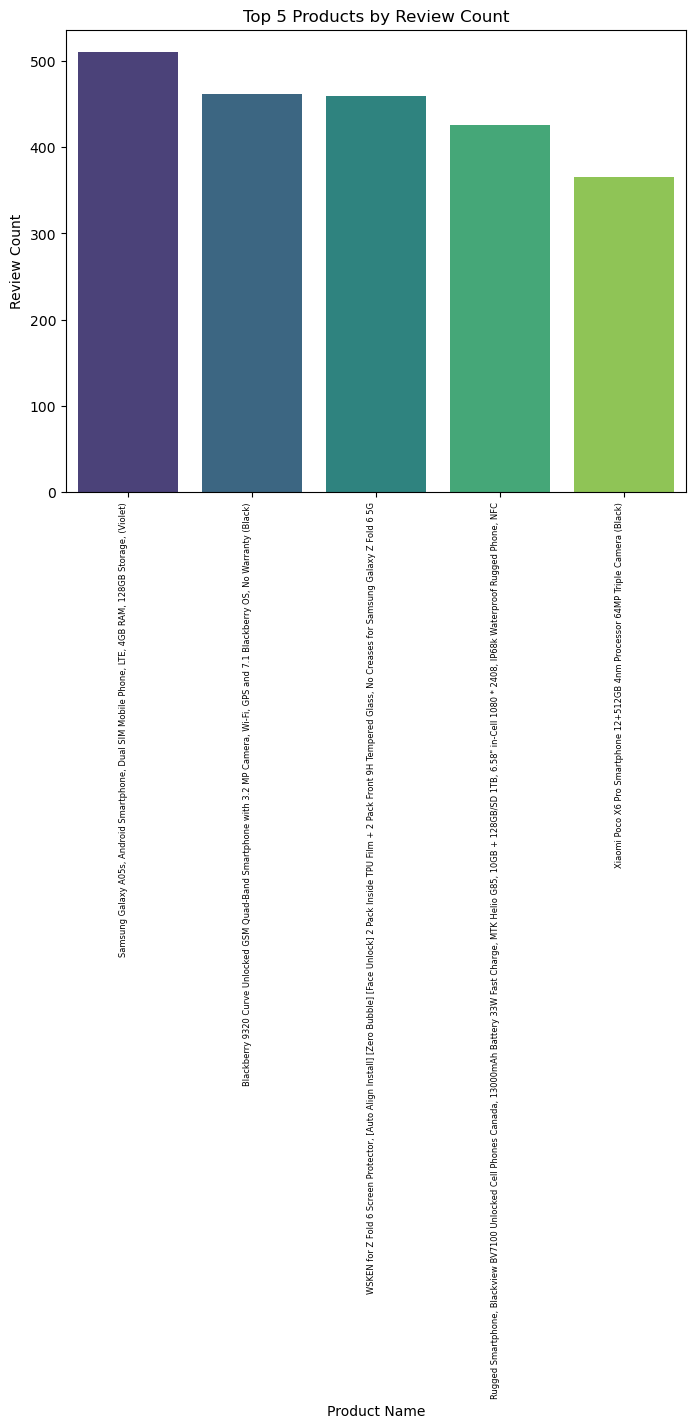

In [502]:

plt.figure(figsize=(8, 6));
sb.barplot(x='Product Name', y='Review Count', data=top_5_products, palette='viridis');
plt.xlabel('Product Name');
plt.ylabel('Review Count');
plt.title('Top 5 Products by Review Count');
plt.xticks(rotation=90, ha='right', fontsize = 6);# Rotate x-axis labels for better readability
plt.show();